In [17]:
import os
os.chdir('..')
from notebooks import config
import geopandas as gpd
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from swatnet_infer import get_s1pair_nor
from utils.transform_xy import coor2coor, imagexy2geo, geo2imagexy


In [25]:
tile_id = '031'
path_shp = config.root_tb_data + '/tiles_shp/tibet_tiles.gpkg'
path_tile_s1as = config.root_tb_data + '/tibet-202008/s1_ascend/tibet_s1as_202008_tile_' + tile_id + '.tif'
path_tile_s1des = config.root_tb_data + '/tibet-202008/s1_descend/tibet_s1des_202008_tile_' + tile_id + '.tif'
path_tile_wat = config.root_tb_data + '/tibet-202008/s1_water/tibet_s1_202008_tile_' + tile_id + '_water.tif'


In [26]:
s1_as, s1_as_info = readTiff(path_in=path_tile_s1as)
s1_des, s1_des_info = readTiff(path_in=path_tile_s1des)
s1_wat, s1_wat_info = readTiff(path_in=path_tile_wat)
print(s1_as_info)



{'geoextent': (95.93279599016353, 97.17705249019748, 27.68787368713189, 28.82532049988403), 'geotrans': (95.93279599016353, 8.983152841195215e-05, 0.0, 28.82532049988403, 0.0, -8.983152841195215e-05), 'geosrs': '4326', 'row': 12662, 'col': 13851, 'bands': 2}


In [27]:
s1_tile_nor = get_s1pair_nor(s1_as=s1_as, s1_des=s1_des)



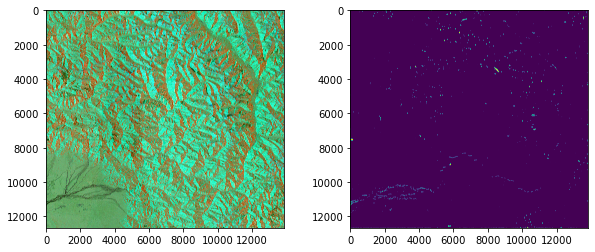

In [28]:
plt.figure(figsize=(10,4))
## tile image
plt.subplot(1,2,1)
imgShow(s1_tile_nor, color_bands=(2,1,0), clip_percent=2, per_band_clip=True)

## tile water
plt.subplot(1,2,2)
imgShow(s1_wat)


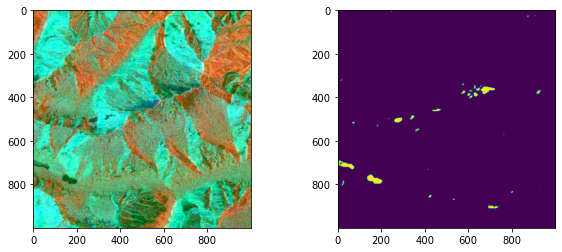

In [33]:
plt.figure(figsize=(10,4))
## tile image
plt.subplot(1,2,1)
imgShow(s1_tile_nor[2000:3000, 9000:10000,:], \
                    color_bands=(2,1,0), clip_percent=2, per_band_clip=True)

## tile water
plt.subplot(1,2,2)
imgShow(s1_wat[2000:3000, 9000:10000])

